In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Dataframe
La estructura de datos básica de Pandas es el DataFrame. Consiste en una tabla con renglones que tienen una clave asignada, y las columnas, llamadas series, contienen muchos valores. Puede crearse un dataframe a partir de un diccionario con el constructor `DataFrame`:
```Python
# Crear diccionario
dictionary = {...}
# Crear dataframe a partir de diccionario
dataframe = pd.DataFrame(dictionary, columns = ['s1', ...])
```

## Reading
Una forma común de entregar los datos es a través de formas delimitados por comas: CSV. En este formato cada línea es un registro de datos, cada uno de los cuales tiene varios campos separados por comas.

In [2]:
edu = pd.read_csv('educ_figdp_1_Data.csv',
                na_values = ':',
                usecols = ["TIME","GEO","Value"] )

In [3]:
edu

,TIME,GEO,Value
0,2000,European Union (28 countries),NaN
1,2001,European Union (28 countries),NaN
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95
...,...,...,...
379,2007,Finland,5.90
380,2008,Finland,6.10
381,2009,Finland,6.81
382,2010,Finland,6.85


Para ver diferentes secciones del dataframe se pueden utilizar los métodos head y tail:

In [4]:
edu.head()

,TIME,GEO,Value
0,2000,European Union (28 countries),NaN
1,2001,European Union (28 countries),NaN
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95


In [5]:
edu.tail()

,TIME,GEO,Value
379,2007,Finland,5.90
380,2008,Finland,6.10
381,2009,Finland,6.81
382,2010,Finland,6.85
383,2011,Finland,6.76


Para conocer los índices o nombres de las columnas, o incluso cambiarlos, se utilizan los atributos:

In [6]:
edu.index

RangeIndex(start=0, stop=384, step=1)

In [7]:
edu.columns

Index(['TIME', 'GEO', 'Value'], dtype='object')

Un resumen estadístico rápido se puede ver con la función describe, que muestra la media, desviación estándar, máximos y mínimos y los percentiles.

In [8]:
edu.describe()

,TIME,Value
count,384.000000,361.000000
mean,2005.500000,5.203989
std,3.456556,1.021694
min,2000.000000,2.880000
25%,2002.750000,4.620000
50%,2005.500000,5.060000
75%,2008.250000,5.660000
max,2011.000000,8.810000


## Seleccionar

Para seleccionar una columa del dataframe, se utiliza la estructura de datos `serie` que se obtiene al colocar la columna en corchetes:

In [9]:
edu['Value']

0       NaN
1       NaN
2      5.00
3      5.03
4      4.95
       ... 
379    5.90
380    6.10
381    6.81
382    6.85
383    6.76
Name: Value, Length: 384, dtype: float64

Para seleccionar una fracción del dataframe, se utiliza la posición de los índices como referencia, no las etiquetas. Esto es una rebanada o *slice* de renglones:

In [10]:
edu[10:14]

,TIME,GEO,Value
10,2010,European Union (28 countries),5.41
11,2011,European Union (28 countries),5.25
12,2000,European Union (27 countries),4.91
13,2001,European Union (27 countries),4.99


Para usar las **etiquetas** como referencias se utiliza el atributo `loc`:

In [11]:
edu.loc[90:94, ['TIME', 'GEO']]

,TIME,GEO
90,2006,Belgium
91,2007,Belgium
92,2008,Belgium
93,2009,Belgium
94,2010,Belgium


## Filtrar datos
Una forma de seleccionar datos es mediante indexados booleanos, o lógicos, como <, ≤, >, ≥ =, ≠:

In [12]:
edu[edu['Value'] > 6.5].tail()

,TIME,GEO,Value
286,2010,Malta,6.74
287,2011,Malta,7.96
381,2009,Finland,6.81
382,2010,Finland,6.85
383,2011,Finland,6.76


## Filtrar datos perdidos
En Python, los valores indefinidos, como división por cero o la raíz cuadrada de un número negativo, se representan con el valor de punto flotante `NaN`. En Pandas, `NaN` se utiliza para representar que faltan valores en un dataframe.

Como la operación `NaN == NaN` siempre retorna `False` (porque son valores indefinidos), **siempre es posible confundir un valor indefinido con un valor faltante**. Para filtrar los valores faltantes se utiliza la función `isnull()`:
```Python
data[data['column'].isnull()]
```

In [13]:
edu[edu["Value"].isnull()].head()

,TIME,GEO,Value
0,2000,European Union (28 countries),NaN
1,2001,European Union (28 countries),NaN
36,2000,Euro area (18 countries),NaN
37,2001,Euro area (18 countries),NaN
48,2000,Euro area (17 countries),NaN


## Manipular datos
Para manipular datos hay funciones comunes como `sum`, `max`, etc. Las funciones se pueden aplicar a cada renglón por columna con `axis = 0` (por defecto), o a cada columna por renglón `axis = 1`, según el argumento.

Las funciones de Pandas excluyen los valores faltantes `NaN`, mientras que en Python se cuentan sin excepción.

In [14]:
edu.max(axis = 0)

TIME      2011
GEO      Spain
Value     8.81
dtype: object

In [15]:
print('Pandas max function:', edu['Value'].max())
print('Python max function:', max(edu['Value']))

Pandas max function: 8.81
Python max function: nan


Se pueden aplicar operaciones ariméticas $+,-,/,\times$ a cada columna, renglón, o a una combinación de ambas.

In [16]:
s = edu['Value'] / 100
s.head()

0       NaN
1       NaN
2    0.0500
3    0.0503
4    0.0495
Name: Value, dtype: float64

Otra manera de aplicar operaciones es agregando la operación como argumento en el método `apply` de un dataframe o una serie.

In [17]:
s = edu['Value'].apply(np.sqrt)
s.head()

0         NaN
1         NaN
2    2.236068
3    2.242766
4    2.224860
Name: Value, dtype: float64

**Para diseñar una función específica** se puede utilizar la función $\lambda$. Para definir la función se escriben los parámetros que recibe la función entre `lambda` y dos puntos `:`.
```Python
dataframe.apply(lambda a1, ... : function )
```

In [18]:
s = edu['Value'].apply(lambda d : d ** 2)
s.head()

0        NaN
1        NaN
2    25.0000
3    25.3009
4    24.5025
Name: Value, dtype: float64

Para crear **nuevas columnas** en un dataframe se realiza la asignación a una columna que no existe (la nueva columna).
```Python
dataframe['NewColumn'] = (...)
```

In [19]:
edu['ValueNorm'] = edu['Value'] / edu['Value'].max()
edu.tail()

,TIME,GEO,Value,ValueNorm
379,2007,Finland,5.90,0.669694
380,2008,Finland,6.10,0.692395
381,2009,Finland,6.81,0.772985
382,2010,Finland,6.85,0.777526
383,2011,Finland,6.76,0.767310


Para remover una columna o un renglón de un dataframe se utiliza la función `drop`. La función `drop` remueve los renglones si `axis = 0` y las columnas si `axis = 1`. Además, en Pandas todas las funciones que modifican un dataframe devuelven una copia del dataframe original. Para sobreescribr en el dataframe original se añade el argumento `inplace = True` (por default es `False`).
```Python
dataframe.drop(... , axis, inplace)
```

In [20]:
edu.drop('ValueNorm', axis = 1, inplace = True)
edu.head()

,TIME,GEO,Value
0,2000,European Union (28 countries),NaN
1,2001,European Union (28 countries),NaN
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95


Para agregar un nuevo renglón al final del dataframe se utiliza la función `concat` de Pandas. La función recibe como parámetros el dataframe original y el dataframe del nuevo renglón en forma de diccionario. Además, al crear el nuevo renglón se añada el índice como el índice máximo más uno.
```Python
dataframe = pd.concat( [ dataframe, pd.Dataframe( dictionary, index ) ] )
```

In [21]:
edu = pd.concat([edu, pd.DataFrame({"TIME" : 2000, "Value" : 5.00, "GEO" : 'a'}, index = [max(edu.index) + 1] ) ] )
edu.tail()

,TIME,GEO,Value
380,2008,Finland,6.10
381,2009,Finland,6.81
382,2010,Finland,6.85
383,2011,Finland,6.76
384,2000,a,5.00


Para remover el último renglón se utiliza la función `drop` y se configura el máximo índice.

In [22]:
edu.drop(max(edu.index), axis = 0, inplace = True)
edu.tail()

,TIME,GEO,Value
379,2007,Finland,5.90
380,2008,Finland,6.10
381,2009,Finland,6.81
382,2010,Finland,6.85
383,2011,Finland,6.76


Para eliminar los valores faltantes `NaN` utilizamos la función `dropna`. Para eliminar todos los valores faltantes cambiamos la palabra clave `how` a `any`. Para restringir la función a un subconjunto de columnas, modificamos el parámetro `subset`.
```Python
newDataFrame = dataframe.dropna( how = 'any', subset = [...], axis = 0 )

```

In [23]:
eduDrop = edu.dropna(how = 'any', subset = ['Value'], axis = 0)
eduDrop.head()

,TIME,GEO,Value
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95
5,2005,European Union (28 countries),4.92
6,2006,European Union (28 countries),4.91


Para rellenar los valores faltantes se utiliza la función `fillna`, y se especifica el valor que se usará. Para aplicar la función solo a columnas específicas, se añade como argumento un diccionario con claves con los nombres de la columna y los datos como el valor.
```Python
newDataFrame = dataframe.fillna( value = {'...' : ... } )
```

In [24]:
eduFilled = edu.fillna( value = {"Value" : 0})
eduFilled.head()

,TIME,GEO,Value
0,2000,European Union (28 countries),0.00
1,2001,European Union (28 countries),0.00
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95


## Ordenar
Para ordenar un dataframe por columnas se utiliza la función `sort`. Por ejemplo, para ordenar los renglones según algún valor numérico:
```Python
dataframe.sort_values(by = 'column', ascending = bool, inplace = True)
```
El parámetro `ascending` configura el orden ascendente (menor a mayor) si es `True` y descendente si es `False`. `inplace` permite sobreescribir el dataframe.

In [25]:
edu.sort_values(by = 'Value', ascending = False, inplace = True)
edu.head()

,TIME,GEO,Value
130,2010,Denmark,8.81
131,2011,Denmark,8.75
129,2009,Denmark,8.74
121,2001,Denmark,8.44
122,2002,Denmark,8.44


Para devolver el orden original se ordena por índice con la función `sort_index` y especificando `axis = 0`:

In [26]:
edu.sort_index(axis = 0, ascending = True, inplace = True)
edu.head()

,TIME,GEO,Value
0,2000,European Union (28 countries),NaN
1,2001,European Union (28 countries),NaN
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95


## Agrupar datos
Una manera de manipular los datos es agrupándolos según un criterio, para lo cual se utiliza la función `groupby`. Al aplicar la función, todos los datos se que compartan el criterio se encuentran en el mismo grupo, **por lo que una función de agregación se aplicará a todas los valores de las columnas de todas las filas dentro del mismo grupo**.
```Python
data[ [...] ].groupby('group').function()
```

In [27]:
group = edu[['GEO', 'Value',]].groupby('GEO')
group.head()

,GEO,Value
0,European Union (28 countries),NaN
1,European Union (28 countries),NaN
2,European Union (28 countries),5.00
3,European Union (28 countries),5.03
4,European Union (28 countries),4.95
...,...,...
372,Finland,5.89
373,Finland,6.06
374,Finland,6.22
375,Finland,6.43


## Reorganizar datos
Para reorganizar una tabla, es posible configurar qué columnas serán los valores, los índices y las nuevas columnas. Se utiliza la función `pivot_table`, y los parámetros son el dataframe, los valores, índices y columnas:
```Python
pd.pivot_table(data, values = '...',
              index = ['...'],
              columns = ['...'])
```

In [28]:
filtered_data = edu[edu['TIME'] > 2005]
pivedu = pd.pivot_table(filtered_data, values = 'Value',
                       index = ['GEO'],
                       columns = ['TIME'])
pivedu.head()

TIME,2006,2007,2008,2009,2010,2011
GEO,,,,,,
Austria,5.40,5.33,5.47,5.98,5.91,5.80
Belgium,5.98,6.00,6.43,6.57,6.58,6.55
Bulgaria,4.04,3.88,4.44,4.58,4.10,3.82
Cyprus,7.02,6.95,7.45,7.98,7.92,7.87
Czech Republic,4.42,4.05,3.92,4.36,4.25,4.51


Para filtrar los datos en el nuevo dataframe se utiliza la función `loc`.

In [29]:
pivedu.loc[['Spain', 'Portugal'], [2006, 2011]]

TIME,2006,2011
GEO,,
Spain,4.26,4.82
Portugal,5.07,5.27


La función `pivot` también acepta un paraámetro para agregar funciones, `aggr_function`. Para agregarla, se escribe el nombre de la función o se diseña usando `lambda`. 

## Calsificación (ranking)
Otra característica importante de manipulación es `ranking`. En el ejemplo `ranking` ordena según `Value` en comparación con los demás países por año.
```Python
data.rank(ascending, method)
```
El parámetro `method` se utiliza para que, en caso de empate, valores con igual ponderación reciban su orden correspondiente. El keyword `first` ordena según el arreglo original.

In [30]:
pivedu = pivedu.drop([
    'Euro area (13 countries)',
    'Euro area (15 countries)',
    'Euro area (17 countries)',
    'Euro area (18 countries)',
    'European Union (25 countries)',
    'European Union (27 countries)',
    'European Union (28 countries)'
    ],
    axis = 0)
pivedu = pivedu.rename(
    index={'Germany (until 1990 former territory of the FRG)': 'Germany'})
pivedu = pivedu.dropna()
pivedu.rank(ascending = False, method = 'first').head()

TIME,2006,2007,2008,2009,2010,2011
GEO,,,,,,
Austria,10.0,7.0,11.0,7.0,8.0,8.0
Belgium,5.0,4.0,3.0,4.0,5.0,5.0
Bulgaria,21.0,21.0,20.0,20.0,22.0,22.0
Cyprus,2.0,2.0,2.0,2.0,2.0,3.0
Czech Republic,19.0,20.0,21.0,21.0,20.0,19.0


Para hacer un *ranking* global se suman las columnas por renglón y se ordena. El parámetro `dense` asigna igual posición a valores iguales.

In [31]:
totalSum = pivedu.sum(axis=1)
totalSum.rank(ascending = False, method = 'dense').sort_values().head()

GEO
Denmark    1.0
Cyprus     2.0
Finland    3.0
Malta      4.0
Belgium    5.0
dtype: float64

## Graficar
Los dataframes y series pueden graficarse con la librería de gráficos **Matplotlib**. El parámetro `kind` se usa para definir el tipo de gráfico, `style` se refiere al estilo de las propiedades del gráfico, como lo puede ser el color. `alpha` añade la composición alfa según un porcentaje para imágenes más translucidas. Finalmente, el título se añade con el keyword `title`.
```Python
data.plot(kind, style, alpha, title)
```

<Axes: title={'center': 'Total Values for Country'}, xlabel='GEO'>

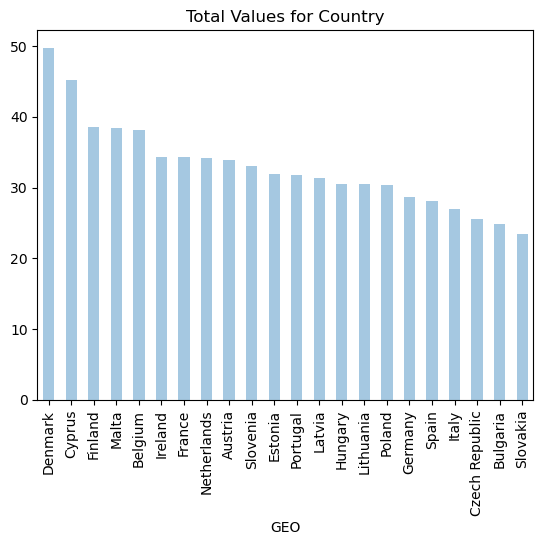

In [32]:
totalSum = pivedu.sum(axis = 1).sort_values(ascending = False)
totalSum.plot(kind = 'bar', style = 'b', alpha = 0.4, title = "Total Values for Country")

También se puede graficar un dataframe directamente. En nuestro ejemplo, en vez de mostrar los valores acumulados se muestran los valores por año. En este caso se utiliza el tipo `barh`, o barra horizontal. Para apilar los valores unos sobre otros se hace `stacked = True`, para diferenciar los valores por color se utiliza una lista de colores previa.

Cuando hay muchas **series** en una gráfica, se añade una leyenda para diferenciar cada una, por default la leyenda aparece en el área del gráfico. Para modificar esto se utiliza la función `legend`. Con el parámetro `loc` se modifica la posición con respecto al gráfico con combinaciones de `right`, `left`, `upper`, `lower` y `center`. El parámetro `bbox_to_anchor` modifica la posición absoluta con respecto al rectángulo delimitador del gráfico.

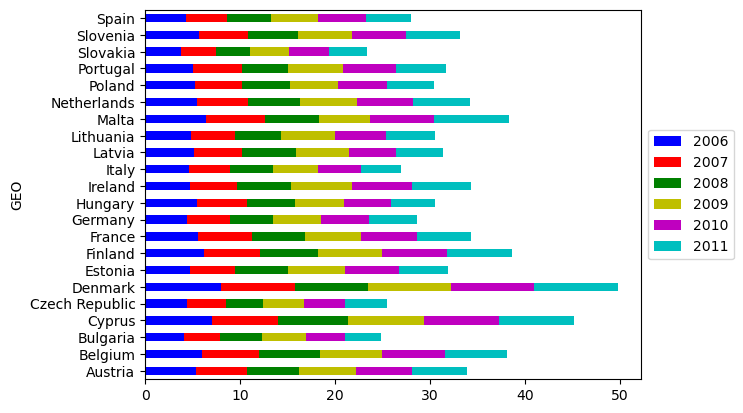

In [33]:
my_colors = ['b', 'r', 'g', 'y', 'm', 'c']
ax = pivedu. plot(kind = 'barh',
                  stacked = True,
                  color = my_colors)
ax.legend(loc = 'center left', bbox_to_anchor = (1,0.5))